In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [2]:
from src import *

02:56 - 03:20


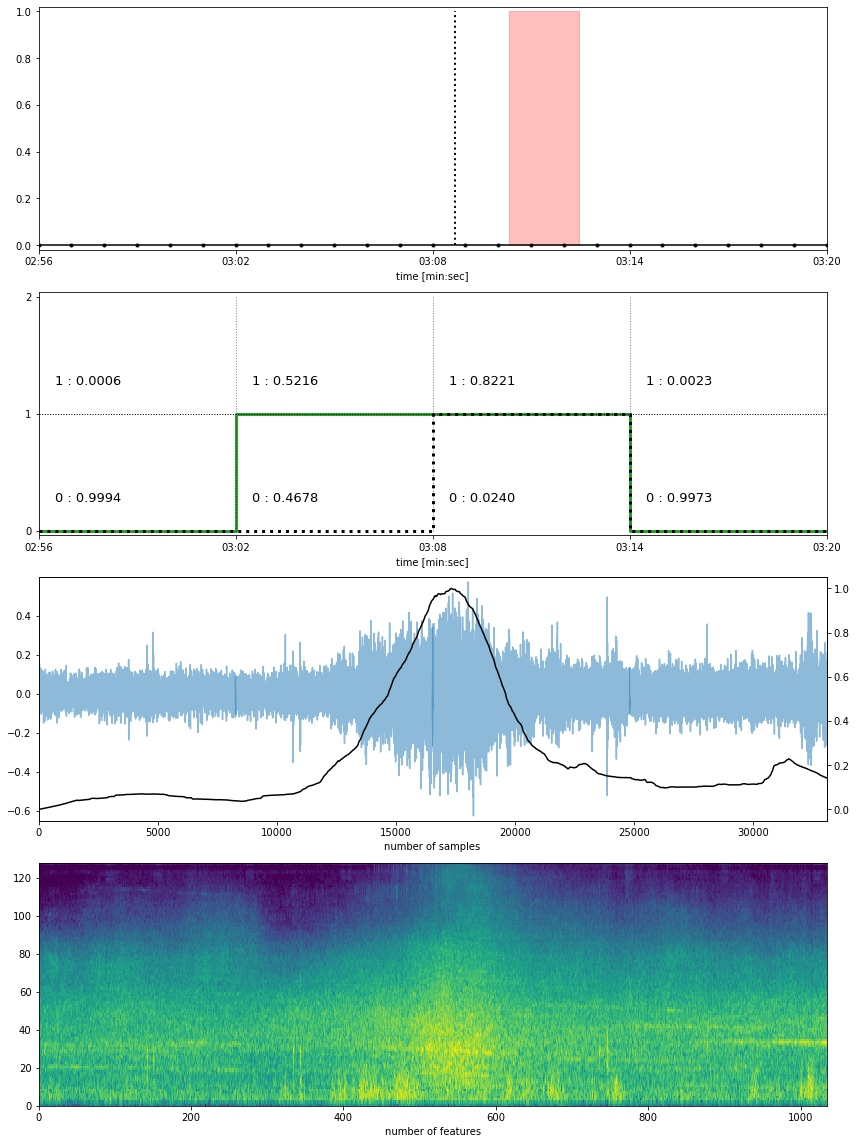

In [4]:
file = '22_Jesenicka_RX100'
uuid = '020_RX100_resized_128/0'
model_name = 'rvce'
from_time = 2 * 60 + 56.5
till_time = from_time + 6 * 4

model, config = load_model_locally(uuid, model_name=model_name, device='cpu')
video = Video(file, config)
predictions, probabilities = validate_video(video, model, from_time=from_time, till_time=till_time, return_probs=True)

show(
    config,
    signal=video.signal,
    best_detection_frame=None, 
    predictions=predictions['n_counts'],
    probabilities=probabilities['n_counts'],
    events_start_time=video.events_start_time,
    events_end_time=video.events_end_time,
    events=video.events,
    views=video.views,
    from_time=from_time,
    till_time=till_time,
    save='plots/near_border.png',
    plot_true_features=False,
    width_multiplier=2
)

100%|██████████| 17/17 [00:00<00:00, 301.27it/s]


02:56 - 03:20


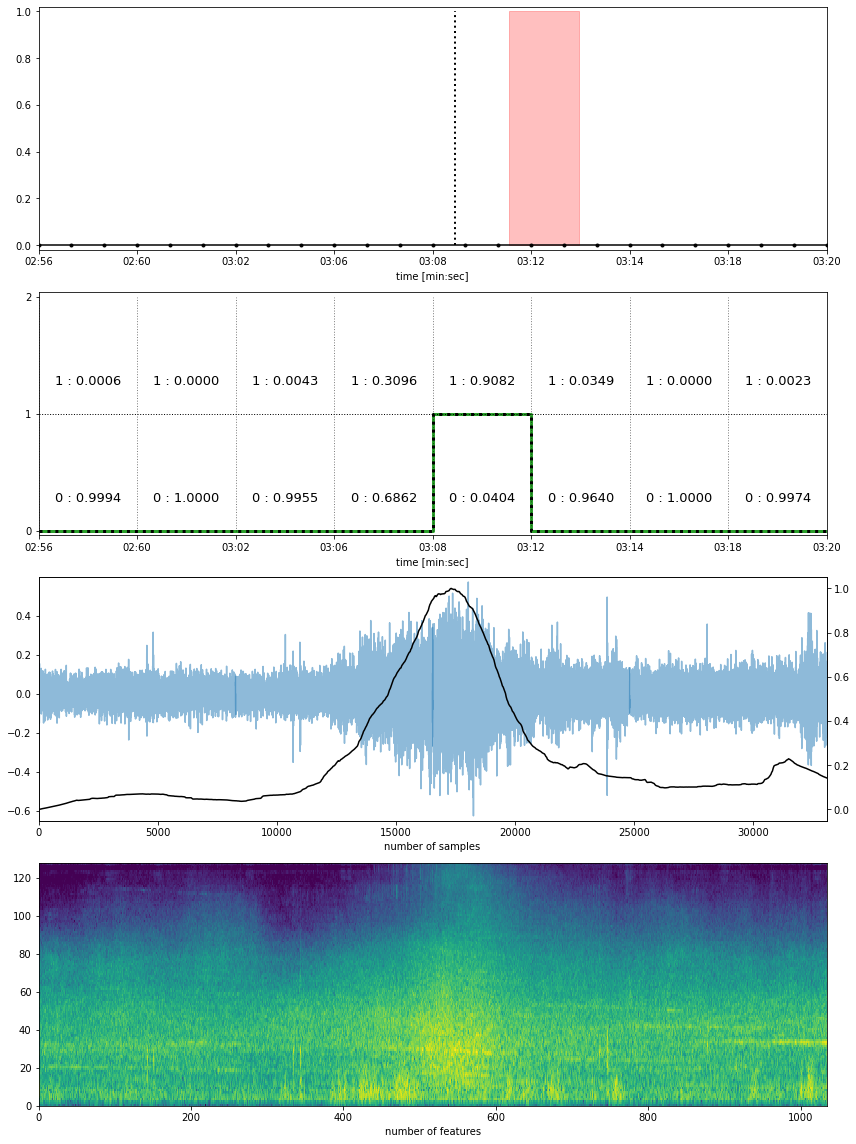

In [5]:
uuid = '020_RX100_resized_128/0'
model, config = load_model_locally(uuid)

from_time = 2 * 60 + 56.5
till_time = from_time + 6 * 4

video = Video('22_Jesenicka_RX100', config)
probs_1 = validate_video(video, model, return_preds=False, from_time=from_time, till_time=till_time)
probs_2 = validate_video(video, model, return_preds=False, from_time=from_time + config.window_length / 2, till_time=till_time)
probs = change_probs_for_doubled_inference(probs_1, probs_2)

head_probs = probs['n_counts']
n_events, seq_len = head_probs.shape
A = SeqEvents(n_events // 2, seq_len + 1)
est_Px, est_Pc, kl_hist = A.deconv(head_probs, n_events)

config.window_length = 3.0
config.nn_hop_length = 3.0

show(
    config,
    signal=video.signal,
    best_detection_frame=None, 
    predictions=est_Px.argmax(0),
    probabilities=est_Px.T,
    events_start_time=video.events_start_time,
    events_end_time=video.events_end_time,
    events=video.events,
    views=video.views,
    from_time=from_time,
    till_time=till_time,
    save='plots/near_border_doubled.png',
    plot_true_features=False,
    width_multiplier=2
)